In [1]:
import matplotlib.pyplot as plt
import random
from GA import genetic_algorithm
import TSP

def solve(problem, 
          population_size=100, 
          generations=100, 
          mutation_rate=0.1, 
          mutation_algorithm='swap', 
          crossover_algorithm='order', 
          selection_algorithm='elitism'):
    n_cities = len(problem)
    random.seed(9)
    solution = genetic_algorithm(n_cities, problem, 
                                 population_size=population_size, 
                                 generations=generations, 
                                 mutation_rate=mutation_rate, 
                                 mutation_algorithm=mutation_algorithm, 
                                 crossover_algorithm=crossover_algorithm, 
                                 selection_algorithm=selection_algorithm)
    
    return solution['distance'], solution['route'], solution['fitness']
def plot_fitness(fitness):
    plt.plot(fitness)
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Fitness over generations")
    plt.show()

In [ ]:
problem = TSP.read_matrix('data/15Cities-1194.txt')
problem

# 1. Ảnh hưởng của các thuật toán khác nhau

* Mutation: Swap
* Crossover: Order
* Selection: Elitism

* Fitness ban đầu cao (khoảng 2400) và giảm nhanh chóng trong vài thế hệ đầu. Điều này cho thấy thuật toán tìm ra các giải pháp tốt hơn trong giai đoạn đầu.
* Từ khoảng thế hệ 40 trở đi, fitness đạt mức ổn định gần 1200, cho thấy thuật toán đã hội tụ và ít cải thiện thêm qua các thế hệ sau.

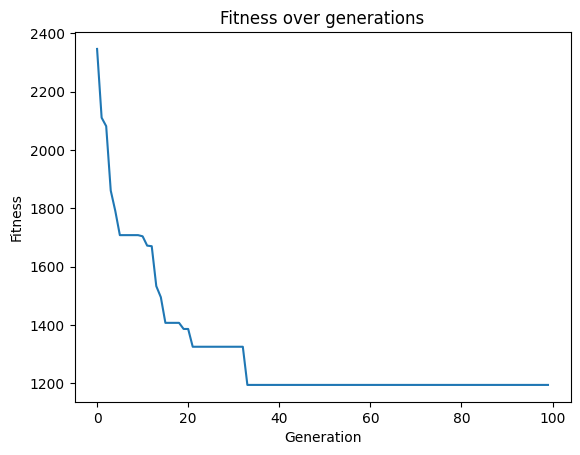

In [41]:
distances, route, fitness = solve(problem, generations=100, mutation_rate=0.01, population_size=100, 
                                    mutation_algorithm='swap', crossover_algorithm='order', selection_algorithm='elitism')
plot_fitness(fitness)

* Tournament Selection 
* Single-Point Crossover 
* Inversion Mutation 

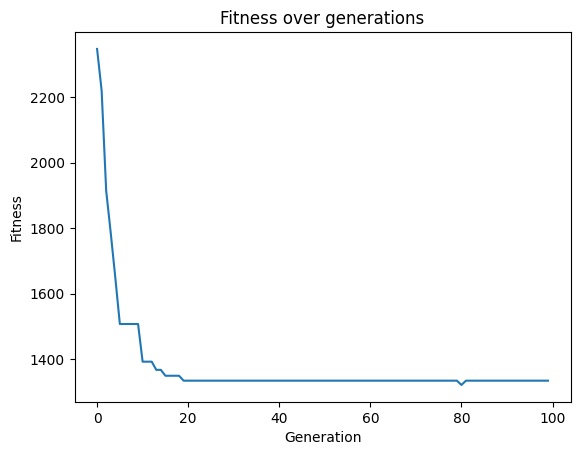

In [42]:
distances, route, fitness = solve(problem, generations=100, mutation_rate=0.01, population_size=100, 
                                    selection_algorithm='tournament', mutation_algorithm='inversion', crossover_algorithm='single_point')
plot_fitness(fitness)

* Fitness giảm mạnh trong khoảng 10 thế hệ đầu tiên, từ mức cao (trên 2200) xuống khoảng 1400. Điều này cho thấy thuật toán nhanh chóng tìm ra các giải pháp tốt hơn trong giai đoạn khởi đầu.
* Từ khoảng thế hệ 20 đến thế hệ 100, fitness khá ổn định và không có cải thiện lớn, dao động nhẹ quanh mức 1400. Điều này có thể cho thấy thuật toán đã hội tụ sớm và có thể đang gặp khó khăn trong việc tìm kiếm các giải pháp tối ưu hơn.
* Nhờ vào sự kết hợp hiệu quả của tournament selection, single-point crossover và inversion mutation. Tournament selection giúp lựa chọn các cá thể tốt nhất, đảm bảo rằng các đặc điểm tốt được duy trì qua các thế hệ. Single-point crossover giữ lại thông tin từ một phần của bố mẹ, giúp duy trì cấu trúc tốt, trong khi inversion mutation tăng cường đa dạng bằng cách đảo ngược thứ tự của một đoạn trên cá thể.

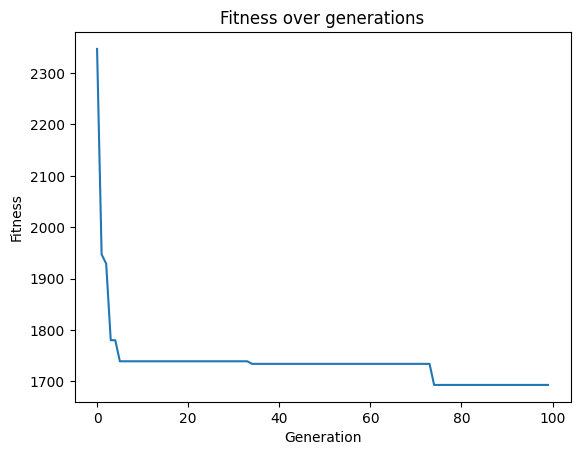

In [43]:
distances, route, fitness = solve(problem, generations=100, mutation_rate=0.01, population_size=100, 
                                    selection_algorithm='rank', mutation_algorithm='scramble', crossover_algorithm='two_point')

plot_fitness(fitness)

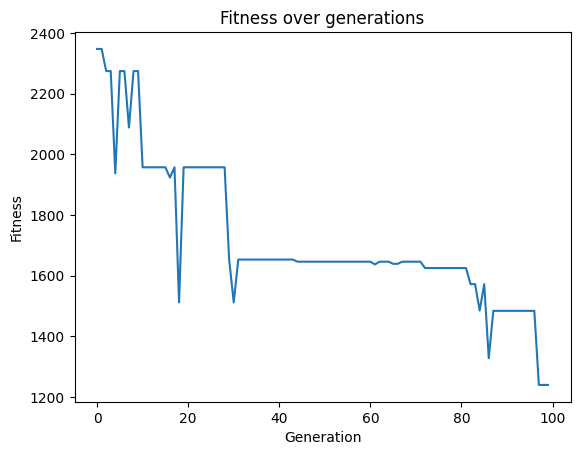

In [44]:
distances, route, fitness = solve(problem, generations=100, mutation_rate=0.01, population_size=100, 
                                    selection_algorithm='roulette_wheel', mutation_algorithm='insertion', crossover_algorithm='uniform')
plot_fitness(fitness)

# 2. Ảnh hưởng của các tham số khác nhau
Ở đây nhóm lấy 3 thuật toán mặc định là:
* Mutation: Swap
* Crossover: Order
* Selection: Elitism

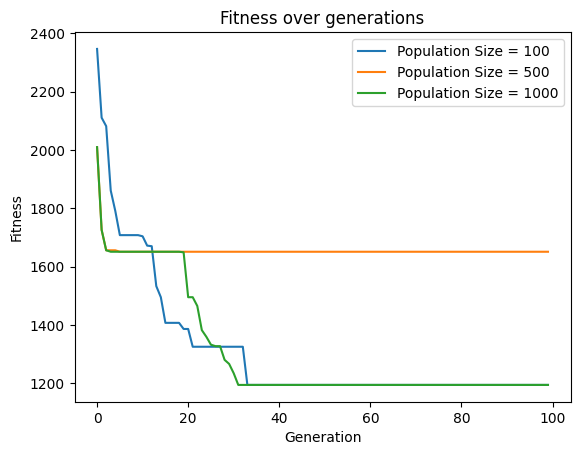

In [ ]:
# Ảnh hưởng của popualation_size
fitness1 = solve(problem, generations=100, mutation_rate=0.01, population_size=100)[2]
fitness2 = solve(problem, generations=100, mutation_rate=0.01, population_size=500)[2]
fitness3 = solve(problem, generations=100, mutation_rate=0.01, population_size=1000)[2]

plt.plot(fitness1, label='Population Size = 100')
plt.plot(fitness2, label='Population Size = 500')
plt.plot(fitness3, label='Population Size = 1000')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness over generations")
plt.legend()
plt.show()

Đánh giá kết quả:
- Population_size lớn hơn (500, 1000) thường dẫn đến giải pháp tốt hơn so với population_size nhỏ (100).
- Sự đa dạng trong quần thể cao hơn sẽ giúp tránh trường hợp tối ưu cục bộ.
- Tuy nhiên quần thể lớn hơn cần nhiều tài nguyên tính toán hơn nên thời gian tính toán tăng lên đáng kể.
- Quần thể lớn hơn thì tốc độ hội tụ chậm hơn (thể hiện qua độ dốc đường fitness).

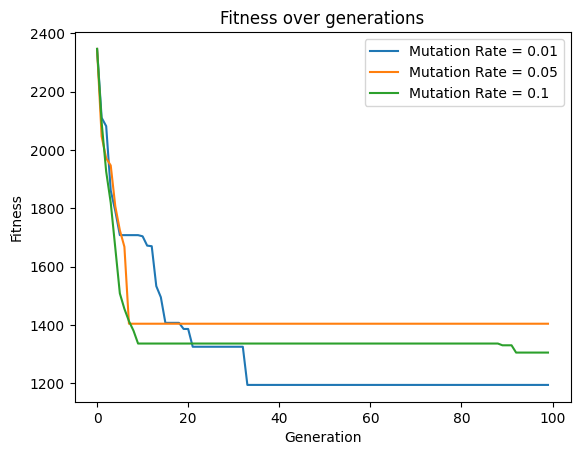

In [ ]:
# Ảnh hưởng của mutation_rate
fitness1 = solve(problem, generations=100, mutation_rate=0.01, population_size=100)[2]
fitness4 = solve(problem, generations=100, mutation_rate=0.05, population_size=100)[2]
fitness5 = solve(problem, generations=100, mutation_rate=0.1, population_size=100)[2]

plt.plot(fitness1, label='Mutation Rate = 0.01')
plt.plot(fitness4, label='Mutation Rate = 0.05')
plt.plot(fitness5, label='Mutation Rate = 0.1')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness over generations")
plt.legend()
plt.show()

Đánh giá kết quả:
- Mutation_rate thấp (0.01) cho ra độ hội tụ ổn định hơn.
- Mutation_rate cao (0.05, 0.1) có thể gây ra nhiều biến động trong fitness, khó hội tụ và có thể dẫn tới làm gián đoạn, phá vỡ một giải pháp tốt.
- Mutation_rate tối ưu cho bài toán này nằm trong khoảng 0.01 đến 0.05

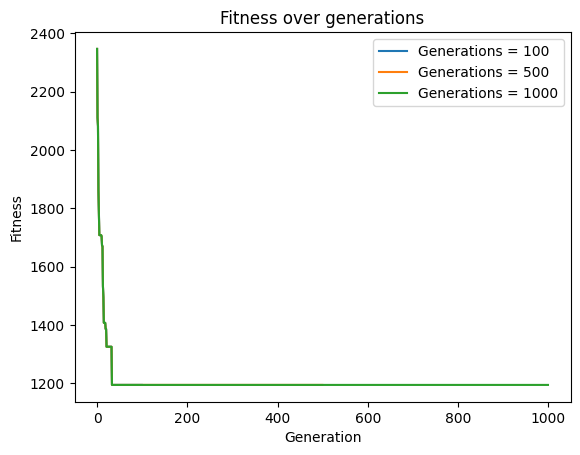

In [ ]:
# Ảnh hưởng của generations
fitness1 = solve(problem, generations=100, mutation_rate=0.01, population_size=100)[2]
fitness2 = solve(problem, generations=500, mutation_rate=0.01, population_size=100)[2]
fitness3 = solve(problem, generations=1000, mutation_rate=0.01, population_size=100)[2]

plt.plot(fitness1, label='Generations = 100')
plt.plot(fitness2, label='Generations = 500')
plt.plot(fitness3, label='Generations = 1000')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness over generations")
plt.legend()
plt.show()

Đánh giá kết quả:
- Generations nhiều hơn (500, 1000) cho phép kết quả được tối ưu hóa tốt hơn.
- Tuy nhiên trong bài toán này, phần lớn sự cải thiện xảy ra ở các thế hệ ban đầu và tăng số thế hệ lên không mang lại cải thiện đáng kể.
- Tốc độ hội tụ giảm đáng kể sau một điểm nhất định.

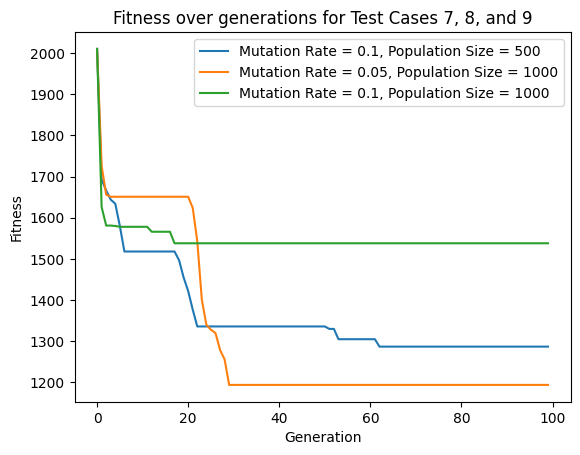

In [ ]:
# Giữ nguyên generations và tăng đồng thời mutation_rate và population_size
fitness1 = solve(problem, generations=100, mutation_rate=0.1, population_size=500)[2]
fitness2 = solve(problem, generations=100, mutation_rate=0.05, population_size=1000)[2]
fitness3 = solve(problem, generations=100, mutation_rate=0.1, population_size=1000)[2]

plt.plot(fitness1, label='Mutation Rate = 0.1, Population Size = 500')
plt.plot(fitness2, label='Mutation Rate = 0.05, Population Size = 1000')
plt.plot(fitness3, label='Mutation Rate = 0.1, Population Size = 1000')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness over generations for Test Cases 7, 8, and 9")
plt.legend()
plt.show()

Đánh giá kết quả:
- Trường hợp Population Size = 1000, Mutation Rate = 0.05:
    - Cho kết quả tốt nhất với fitness hội tụ ở mức 1200
    - Hội tụ ổn định sau khoảng 40 thế hệ
- Trường hợp Population Size = 500, Mutation Rate = 0.1:
    - Fitness dao động nhiều hơn
    - Hội tụ ở mức cao hơn (khoảng 1300)
- Kết luận: Population Size lớn kết hợp với Mutation Rate vừa phải cho kết quả tốt nhất

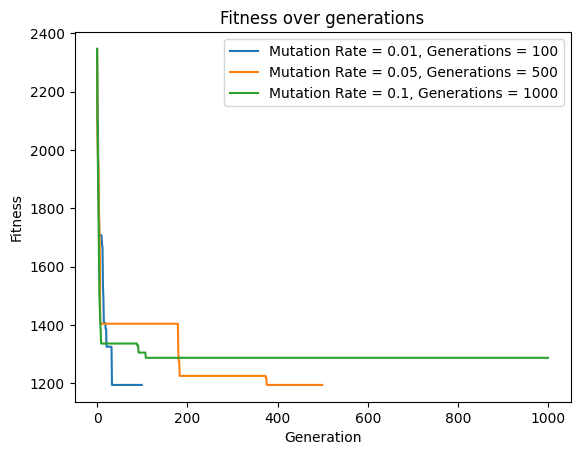

In [ ]:
# Giữ nguyên population_size và tăng đồng thời mutation_rate và generations
fitness1 = solve(problem, generations=100, mutation_rate=0.01, population_size=100)[2]
fitness2 = solve(problem, generations=500, mutation_rate=0.05, population_size=100)[2]
fitness3 = solve(problem, generations=1000, mutation_rate=0.1, population_size=100)[2]
plt.plot(fitness1, label='Mutation Rate = 0.01, Generations = 100')
plt.plot(fitness2, label='Mutation Rate = 0.05, Generations = 500')
plt.plot(fitness3, label='Mutation Rate = 0.1, Generations = 1000') 
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness over generations")
plt.legend()
plt.show()

Đánh giá kết quả:
- Mutation Rate cao (0.1) với Generations=1000:
    - Gây nhiều dao động
    - Khó đạt được giá trị tối ưu toàn cục
- Mutation Rate thấp (0.01) với Generations=100:
    - Hội tụ nhanh
    - Có thể bị mắc kẹt ở tối ưu cục bộ

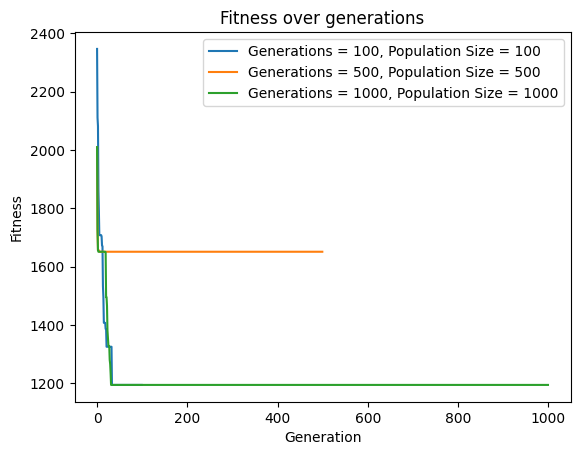

In [ ]:
# Giữ nguyên mutation_rate và tăng đồng thời generations và population_size
fitness1 = solve(problem, generations=100, mutation_rate=0.01, population_size=100)[2]
fitness2 = solve(problem, generations=500, mutation_rate=0.01, population_size=500)[2]
fitness3 = solve(problem, generations=1000, mutation_rate=0.01, population_size=1000)[2]
plt.plot(fitness1, label='Generations = 100, Population Size = 100')
plt.plot(fitness2, label='Generations = 500, Population Size = 500')
plt.plot(fitness3, label='Generations = 1000, Population Size = 1000')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness over generations")
plt.legend()
plt.show()

Đánh giá kết quả:
- Trường hợp (Gen=1000, Pop=1000):
    - Hội tụ nhanh trong 100 thế hệ đầu
    - Đạt được fitness tốt nhất (1200)
    - Ổn định trong suốt quá trình sau đó
- Trường hợp (Gen=500, Pop=500):
    - Hội tụ ở mức fitness cao hơn (1650)
    - Ít cải thiện sau 200 thế hệ
- Trường hợp (Gen=100, Pop=100):
    - Dao động mạnh
    - Khó đạt được giải pháp tối ưu

# Kết luận tổng hợp:
# - Population Size lớn cần đi kèm Mutation Rate vừa phải
# - Số Generations không cần quá lớn nếu đã có Population Size tốt
# - Mutation Rate càng cao càng cần Population Size lớn để ổn định